In [585]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [586]:
data = pd.read_csv("C:/Users/whileduck/Desktop/cars.csv")
sns.set_palette('twilight')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [587]:
df = data.copy()

In [588]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [589]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

# 결측치 비우기 

In [590]:
df = df.dropna()

In [591]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


In [593]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,4025.0,19552.308065,25815.734988,600.0,6999.0,11500.0,21900.0,300000.00
Mileage,4025.0,163.572174,103.394703,0.0,90.0,158.0,230.0,980.00
EngineV,4025.0,2.764586,4.935941,0.6,1.8,2.2,3.0,99.99
Year,4025.0,2006.379627,6.695595,1969.0,2003.0,2007.0,2012.0,2016.00


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Mileage'}>],
       [<AxesSubplot:title={'center':'EngineV'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

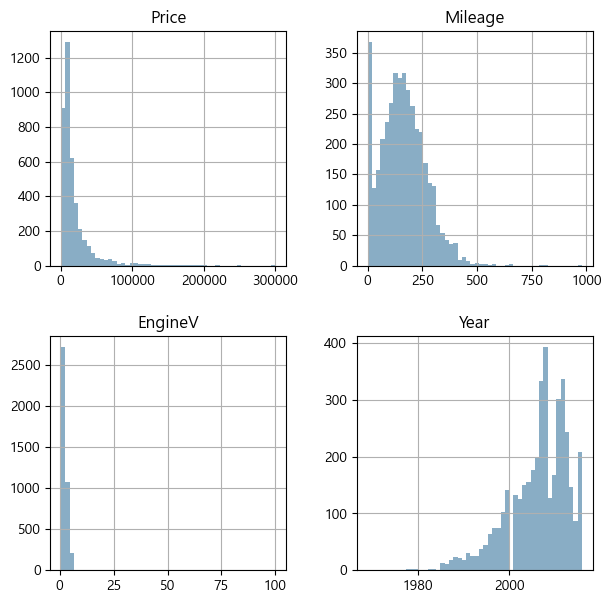

In [594]:
df.hist(figsize = [7,7],bins = 50) #data 들의 왜도가 치우쳐져있다. 

<AxesSubplot:xlabel='Brand', ylabel='Price'>

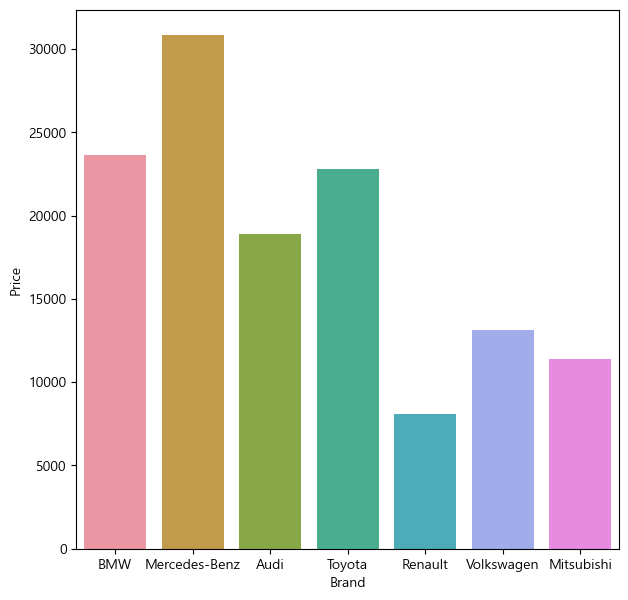

In [595]:
plt.figure(figsize = [7,7])
sns.barplot(data = df ,
            x = 'Brand',
            y = 'Price',
            ci = None)

<AxesSubplot:xlabel='Year', ylabel='Price'>

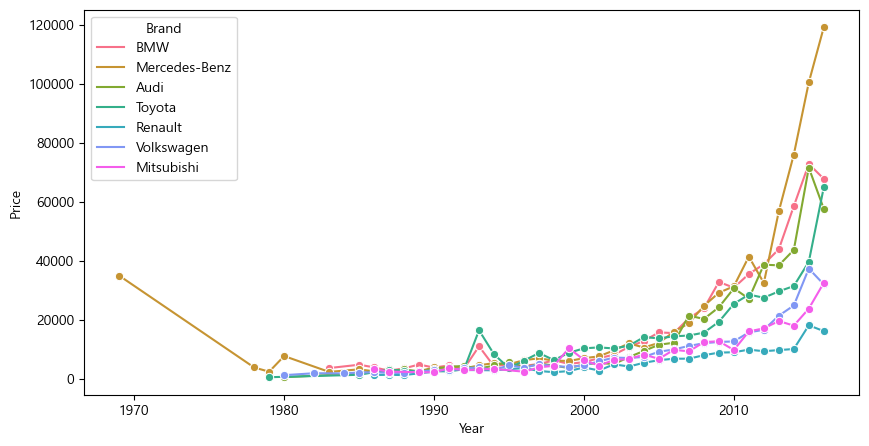

In [596]:
plt.figure(figsize = [10,5])
sns.lineplot(data = df,
             x = 'Year',
             y = 'Price',
             hue = 'Brand',
             ci = None,
             marker = 'o')

<AxesSubplot:xlabel='Body', ylabel='Price'>

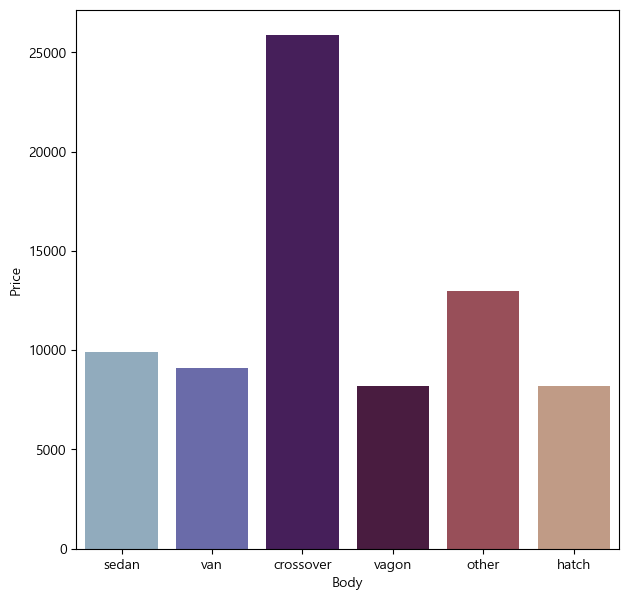

In [597]:
plt.figure(figsize = [7,7])
sns.barplot(data = df ,
            x = 'Body',
            y = 'Price',
            estimator = np.median,
            ci = None)

<AxesSubplot:xlabel='Engine Type', ylabel='Price'>

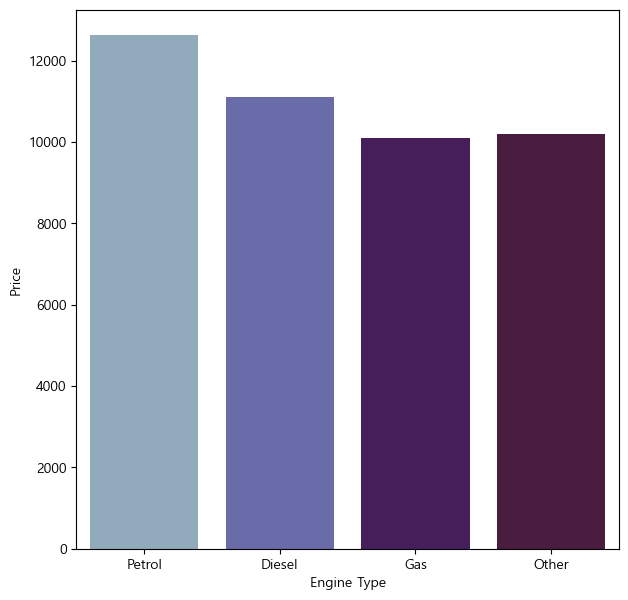

In [598]:
plt.figure(figsize = [7,7])
sns.barplot(data = df ,
            x = 'Engine Type',
            y = 'Price',
            estimator = np.median,
            ci = None)

<AxesSubplot:xlabel='Registration', ylabel='Price'>

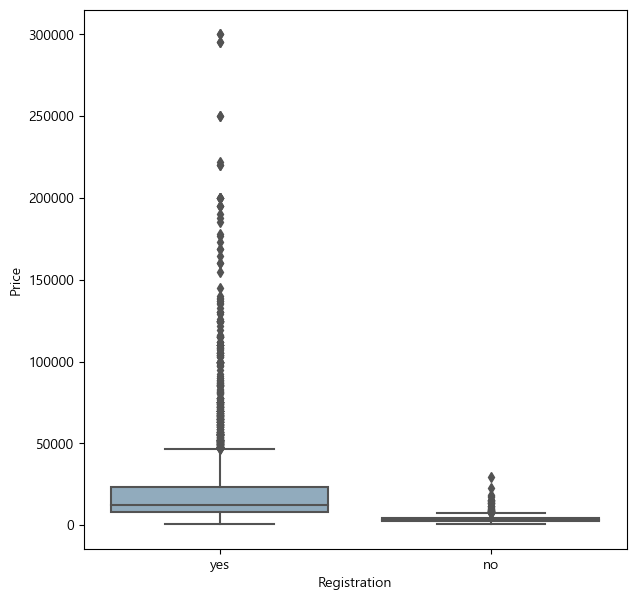

In [599]:
plt.figure(figsize = [7,7])
sns.boxplot(data = df ,
            x = 'Registration',
            y = 'Price')

# 독립변수와 종속변수가 선형성을 보이는가

### 기존의 데이터는 종속변수와 독립변수가 선형성을 보이지 아니함 
### 오히려 지수 함수의 형태 

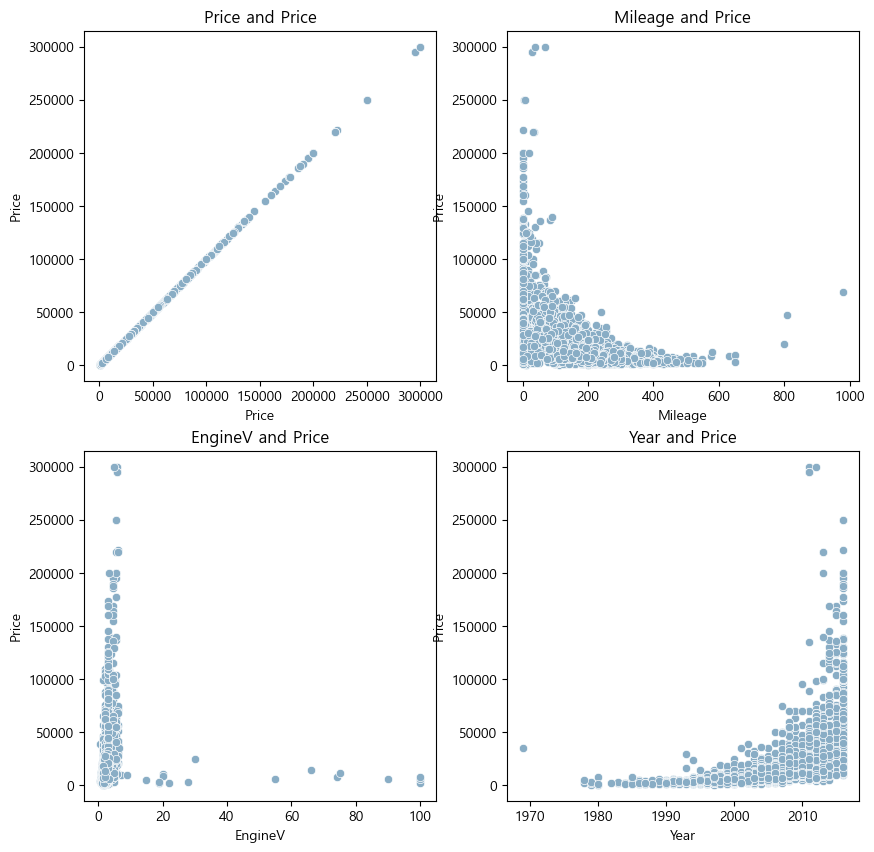

In [600]:
cols = df.describe().columns

plt.figure(figsize = [10,10])
for i,var in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data = df,
                    x = var,
                    y = 'Price')
    plt.title(f'{var} and Price')
    

# 선형성을 보이도록 스케일링
# 종속변수와 독립변수가 지수 함수의 형태를 보여 종속 변수 값에 log 를 취해줌

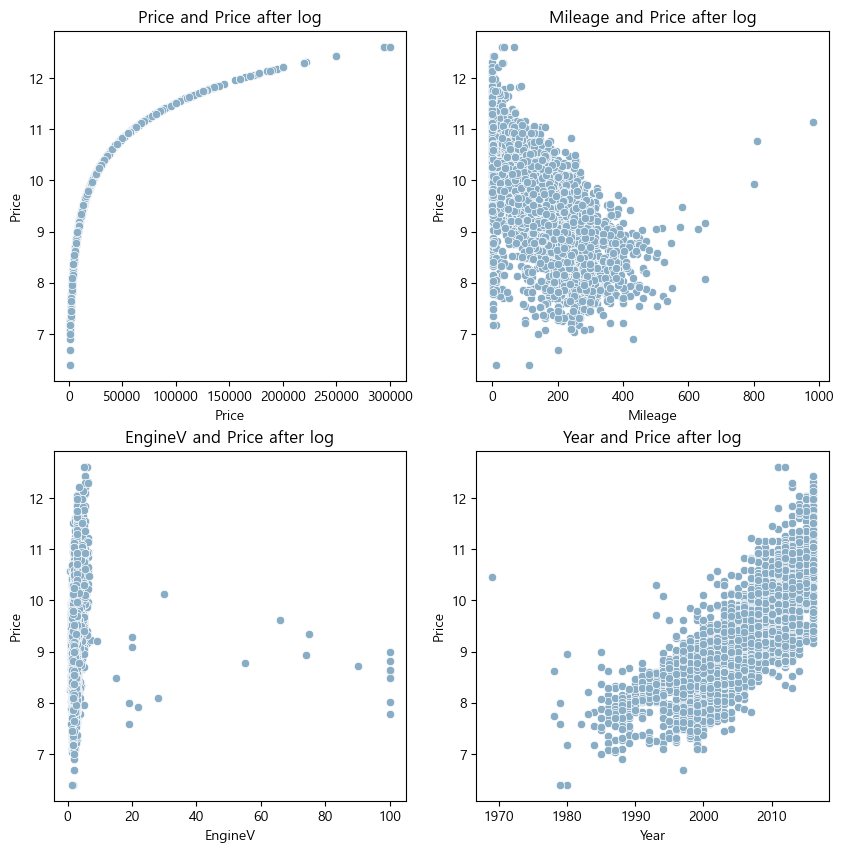

In [601]:
cols = df.describe().columns

plt.figure(figsize = [10,10])
for i,var in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data = df,
                    x = var,
                    y = np.log(df['Price']))
    plt.title(f'{var} and Price after log')
    

# 이렇게 되니 가격과 마일리지, 연식에서 선형성을 보이는 모습이 보임 

In [602]:
df_2 = df.copy() #log 변환 이후의 데이터 

df_2.loc[:,'Price'] = np.log(df_2['Price'])

# 상관관계를 확인해보자

# 로그 변환 전 상관관계 vs 로그 변환 후 상관관계

C:\Users\whileduck\AppData\Local\Temp\ipykernel_16888\1479904012.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'binary',linewidths = 5)


Text(0.5, 1.0, '로그 변환 이전')

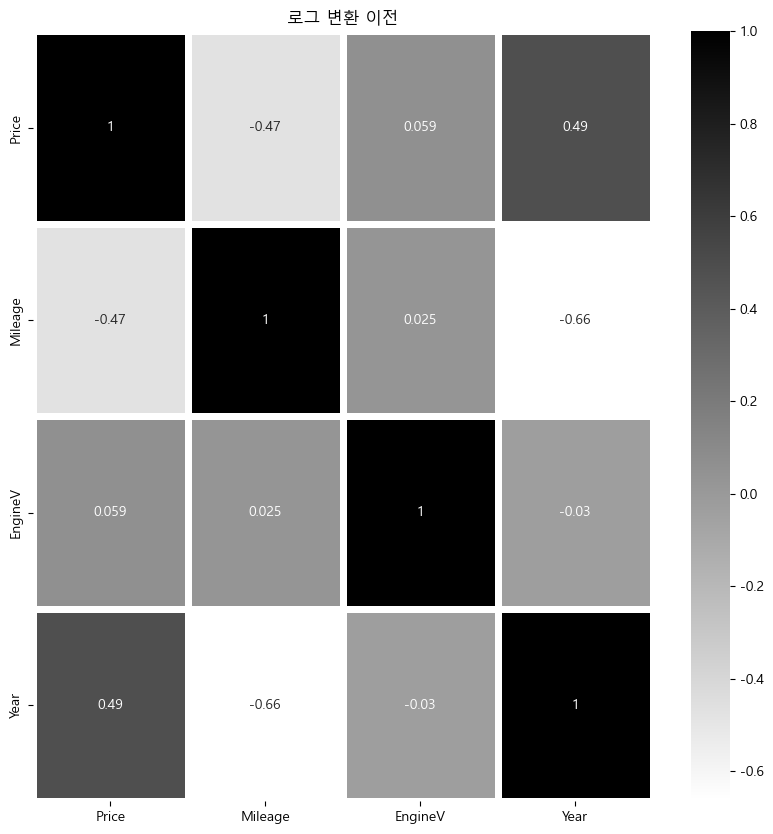

In [603]:
plt.figure(figsize = [10,10])
sns.heatmap(df.corr(), annot = True, cmap = 'binary',linewidths = 5) 
plt.title('로그 변환 이전')

C:\Users\whileduck\AppData\Local\Temp\ipykernel_16888\2747940117.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2.corr(), annot = True, cmap = 'binary' , linewidths = 5)


<AxesSubplot:>

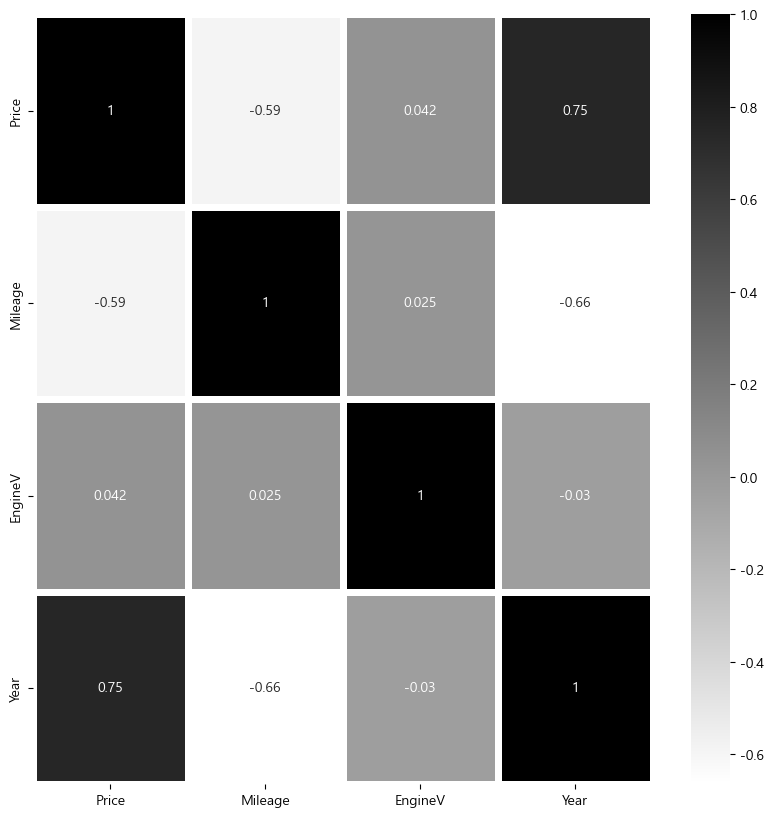

In [604]:
plt.figure(figsize = [10,10])
sns.heatmap(df_2.corr(), annot = True, cmap = 'binary' , linewidths = 5)

# 로그 변환 이후가 target 변수인 Price 와 독립변수들의 상관관계가 더 강한 것을 볼 수 있음 

# 로그 변환을 시행한 데이터로 회귀모형 설정 후 예측하기

In [605]:
df_2 = df_2.join(pd.get_dummies(df_2[['Brand','Body','Engine Type']]))

In [606]:
df_2 = df_2.drop(columns = ['EngineV','Brand','Body','Engine Type'],axis = 1)

In [607]:
df_2 = df_2.drop('Model',axis = 1)

In [608]:
df_2['Registration']= df_2['Registration'].map({'yes': 1, 'no': 0})

In [609]:
df_2

,Price,Mileage,Registration,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,277,1,1991,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,8.974618,427,1,1999,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,9.495519,358,1,2003,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,10.043249,240,1,2007,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9.814656,120,1,2011,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,9.792556,35,1,2014,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4340,11.736069,9,1,2014,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4341,8.779557,1,1,1999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4342,8.987197,194,1,1985,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [610]:
x_train, y_train, x_test, y_test  = train_test_split(df_2.drop('Price',axis =1), df_2['Price'],
                                                    test_size = 0.2)

In [611]:
model = sm.OLS(x_test,x_train).fit()

In [612]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     963.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:33:32   Log-Likelihood:                -1414.1
No. Observations:                3220   AIC:                             2864.
Df Residuals:                    3202   BIC:                             2974.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Mileage                -0.0011   9.41e-05    -11.928      0.000      -0.001      -0.001
Registration            0.8993      0.025     35.868      0.000       0.850       0.948
Year                    0.0804      0.001     56.088      0.000       0.078       0.083
Brand_Audi            -38.7327      0.736    -52.651      0.000     -40.175     -37.290
Brand_BMW             -38.6300      0.736    -52.505      0.000     -40.073     -37.187
Brand_Mercedes-Benz   -38.5880      0.736    -52.422      0.000     -40.031     -37.145
Brand_Mitsubishi      -39.3610      0.736    -53.473      0.000     -40.804     -37.918
Brand_Renault         -39.5212      0.737    -53.605      0.000     -40.967     -38.076
Brand_Toyota          -38.9580      0.737    -52.847      0.000     -40.403     -37.513
Brand_Volkswagen      -39.0736      0.736    -53.080      0.000     -40.517     -37.630
Body_crossover        -45.0035      0.861    -52.289      0.000     -46.691     -43.316
Body_hatch            -45.7358      0.856    -53.425      0.000     -47.414     -44.057
Body_other            -45.4014      0.859    -52.826      0.000     -47.086     -43.716
Body_sedan            -45.5089      0.858    -53.035      0.000     -47.191     -43.826
Body_vagon            -45.5723      0.859    -53.064      0.000     -47.256     -43.888
Body_van              -45.6426      0.861    -53.031      0.000     -47.330     -43.955
Engine Type_Diesel    -68.1724      1.290    -52.828      0.000     -70.703     -65.642
Engine Type_Gas       -68.2484      1.287    -53.049      0.000     -70.771     -65.726
Engine Type_Other     -68.2208      1.289    -52.927      0.000     -70.748     -65.694
Engine Type_Petrol    -68.2227      1.287    -52.995      0.000     -70.747     -65.699
==============================================================================
Omnibus:                      698.354   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4891.927
Skew:                           0.846   Prob(JB):                         0.00
Kurtosis:                       8.797   Cond. No.                     7.37e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.4e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [613]:
r2_score(y_test,model.predict(y_train))

0.8324822491899707

C:\Users\whileduck\AppData\Local\Temp\ipykernel_16888\3030252719.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.array(y_test[:30]), c = 'b', ls = '--')


Text(0.5, 1.0, '실제값 = 파란색 \n 예측값 = 빨간색')

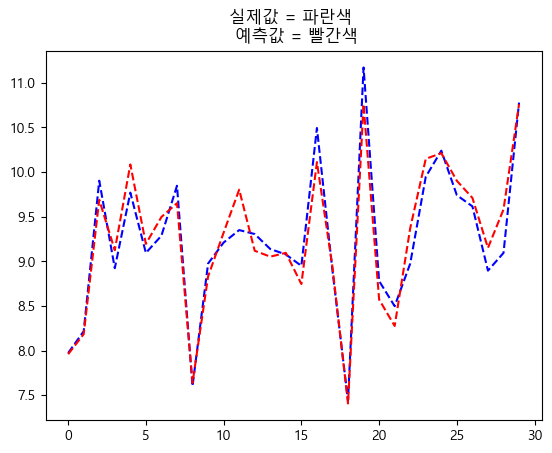

In [614]:
plt.plot(np.array(y_test[:30]), c = 'b', ls = '--')
plt.plot(np.array(model.predict(y_train[:30])), c = 'r', ls = '--')
plt.title('실제값 = 파란색 \n 예측값 = 빨간색')

# 잔차 사후검정

In [500]:
predicted_value = model.predict(y_train)

In [498]:
def scaler(df):
    mean = df.mean()
    sd = df.var()**0.5
    
    return (df-mean)/sd

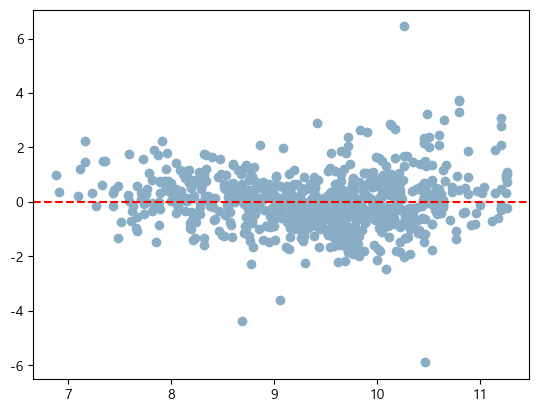

In [503]:
plt.scatter(predicted_value, scaler(y_test - predicted_value))
plt.axhline(y = 0, ls = '--', c = 'r')

<AxesSubplot:ylabel='Density'>

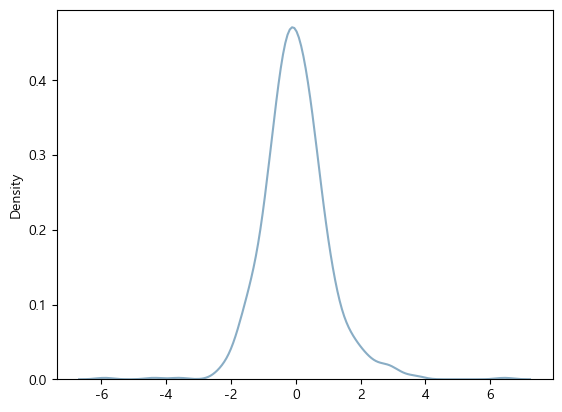

In [504]:
sns.kdeplot(scaler(y_test - predicted_value))

# 스케일링 안한 데이터로 회귀모형 설정하고 예측하기

In [565]:
df = df.join(pd.get_dummies(df[['Brand','Body','Engine Type']]))

In [566]:
df = df.drop(columns = ['EngineV','Brand','Body','Engine Type'],axis = 1)

In [567]:
df = df.drop('Model',axis = 1)

In [568]:
df['Registration']= df['Registration'].map({'yes': 1, 'no': 0})

In [569]:
x_train, y_train, x_test, y_test  = train_test_split(df.drop('Price',axis =1), df['Price'],
                                                    test_size = 0.2)

In [571]:
model = sm.OLS(x_test,x_train).fit()

In [572]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     165.5
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:30:40   Log-Likelihood:                -36051.
No. Observations:                3220   AIC:                         7.214e+04
Df Residuals:                    3202   BIC:                         7.225e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Mileage               -60.1580      4.287    -14.034      0.000     -68.563     -51.753
Registration         7177.7992   1178.997      6.088      0.000    4866.134    9489.464
Year                 1046.0747     66.896     15.637      0.000     914.912    1177.237
Brand_Audi          -5.258e+05   3.43e+04    -15.324      0.000   -5.93e+05   -4.59e+05
Brand_BMW           -5.237e+05   3.43e+04    -15.261      0.000   -5.91e+05   -4.56e+05
Brand_Mercedes-Benz -5.174e+05   3.43e+04    -15.067      0.000   -5.85e+05    -4.5e+05
Brand_Mitsubishi     -5.41e+05   3.43e+04    -15.759      0.000   -6.08e+05   -4.74e+05
Brand_Renault       -5.407e+05   3.44e+04    -15.721      0.000   -6.08e+05   -4.73e+05
Brand_Toyota         -5.34e+05   3.44e+04    -15.524      0.000   -6.01e+05   -4.67e+05
Brand_Volkswagen    -5.339e+05   3.44e+04    -15.539      0.000   -6.01e+05   -4.67e+05
Body_crossover      -6.081e+05   4.02e+04    -15.141      0.000   -6.87e+05   -5.29e+05
Body_hatch          -6.248e+05      4e+04    -15.637      0.000   -7.03e+05   -5.46e+05
Body_other          -6.181e+05   4.01e+04    -15.418      0.000   -6.97e+05   -5.39e+05
Body_sedan          -6.209e+05      4e+04    -15.515      0.000   -6.99e+05   -5.42e+05
Body_vagon          -6.216e+05   4.01e+04    -15.514      0.000      -7e+05   -5.43e+05
Body_van             -6.23e+05   4.01e+04    -15.525      0.000   -7.02e+05   -5.44e+05
Engine Type_Diesel  -9.274e+05   6.02e+04    -15.402      0.000   -1.05e+06   -8.09e+05
Engine Type_Gas     -9.308e+05      6e+04    -15.511      0.000   -1.05e+06   -8.13e+05
Engine Type_Other   -9.302e+05   6.01e+04    -15.470      0.000   -1.05e+06   -8.12e+05
Engine Type_Petrol  -9.282e+05   6.01e+04    -15.456      0.000   -1.05e+06    -8.1e+05
==============================================================================
Omnibus:                     3463.245   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           348032.915
Skew:                           5.277   Prob(JB):                         0.00
Kurtosis:                      52.826   Cond. No.                     1.07e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [573]:
r2_score(y_test,model.predict(y_train))

0.4080110897857421

C:\Users\whileduck\AppData\Local\Temp\ipykernel_16888\3492318999.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.array(y_test[:20]), ls = '--', c = 'b')


Text(0.5, 1.0, '실제값 = 파란색 \n 예측값 = 빨간색')

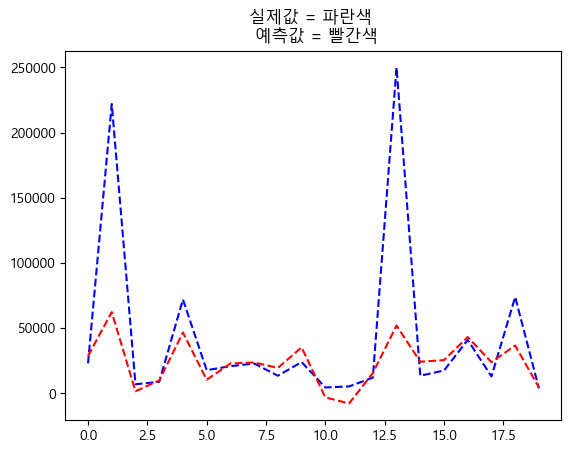

In [579]:
plt.plot(np.array(y_test[:20]), ls = '--', c = 'b')
plt.plot(np.array(model.predict(y_train[:20])), ls  = '--', c = 'r')
plt.title('실제값 = 파란색 \n 예측값 = 빨간색' )

# 사후검정

Text(0.5, 1.0, '잔차가 종속 변수 값이 커짐에 따라 분산이 커짐')

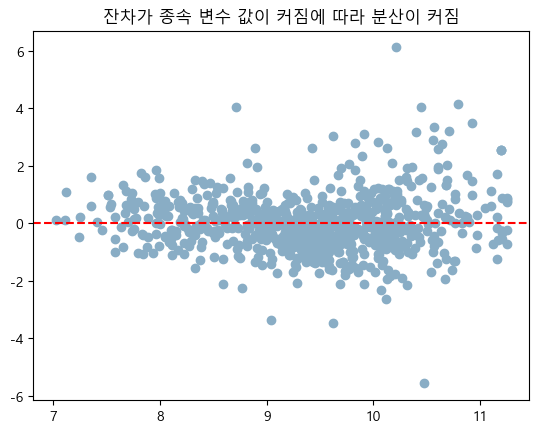

In [621]:
plt.scatter(model.predict(y_train), scaler(y_test - model.predict(y_train)) )
plt.axhline(y = 0, ls = '--', c = 'r')
plt.title('잔차가 종속 변수 값이 커짐에 따라 분산이 커짐')

Text(0.5, 1.0, '정규성을 보이지 않는다')

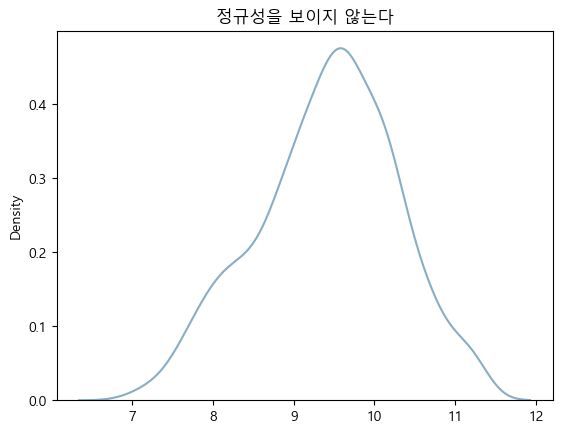

In [620]:
sns.kdeplot(model.predict(y_train))
plt.title('정규성을 보이지 않는다')